<a href="https://colab.research.google.com/github/aritanaoya/football_analysis/blob/main/J1Predict_by_AutoML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret==2.3.1

In [4]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


In [45]:
import numpy as np
import pandas as pd
import time

csv = '/content/scrapeData20211102.csv'
data = pd.read_csv(csv)
data.shape

(656, 24)

# データの加工

In [51]:
dataList = ['ＰＫ','セットプレー直接','セットプレーから','クロスから','スルーパスから','ショートパスから','ロングパスから','ドリブルから','こぼれ球から','その他',
            'PK_A','セットプレー直接_A','セットプレーから_A','クロスから_A','スルーパスから_A','ショートパスから_A','ロングパスから_A','ドリブルから_A','こぼれ球から_A','その他_A']
for item in dataList:   
    data[item] = data[item].str.replace('(', '')
    data[item] = data[item].str.replace(')', '')
    data[item] = data[item].str.replace('%', '').astype(np.float64) / 100
data

,Unnamed: 0,試合日,チーム名,スコア,ＰＫ,セットプレー直接,セットプレーから,クロスから,スルーパスから,ショートパスから,ロングパスから,ドリブルから,こぼれ球から,その他,PK_A,セットプレー直接_A,セットプレーから_A,クロスから_A,スルーパスから_A,ショートパスから_A,ロングパスから_A,ドリブルから_A,こぼれ球から_A,その他_A
0,home,2021-8-9-15:00,札幌,2,0.098,0.000,0.268,0.049,0.024,0.220,0.049,0.122,0.098,0.073,0.089,0.000,0.244,0.267,0.044,0.200,0.000,0.044,0.089,0.022
1,away,2021-8-9-15:00,浦和,1,0.159,0.023,0.136,0.182,0.114,0.205,0.068,0.045,0.045,0.023,0.029,0.059,0.147,0.235,0.029,0.176,0.088,0.029,0.118,0.088
2,home,2021-8-14-14:00,札幌,3,0.098,0.000,0.268,0.049,0.024,0.220,0.049,0.122,0.098,0.073,0.089,0.000,0.244,0.267,0.044,0.200,0.000,0.044,0.089,0.022
3,away,2021-8-14-14:00,FC東京,2,0.047,0.047,0.116,0.209,0.047,0.279,0.023,0.070,0.140,0.023,0.000,0.000,0.262,0.190,0.024,0.238,0.024,0.024,0.143,0.095
4,home,2021-8-28-14:00,札幌,0,0.098,0.000,0.268,0.049,0.024,0.220,0.049,0.122,0.098,0.073,0.089,0.000,0.244,0.267,0.044,0.200,0.000,0.044,0.089,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,away,2021-3-21-14:00,広島,3,0.105,0.053,0.263,0.105,0.105,0.132,0.053,0.105,0.079,0.000,0.091,0.030,0.182,0.182,0.061,0.242,0.061,0.000,0.152,0.000
652,home,2021-2-27-14:00,大分,1,0.083,0.000,0.292,0.167,0.000,0.125,0.000,0.083,0.250,0.000,0.041,0.020,0.122,0.286,0.061,0.265,0.020,0.041,0.082,0.061
653,away,2021-2-27-14:00,徳島,1,0.069,0.000,0.207,0.172,0.138,0.138,0.034,0.000,0.172,0.069,0.082,0.020,0.245,0.061,0.102,0.245,0.041,0.020,0.122,0.061
654,home,2021-5-15-16:00,大分,1,0.083,0.000,0.292,0.167,0.000,0.125,0.000,0.083,0.250,0.000,0.041,0.020,0.122,0.286,0.061,0.265,0.020,0.041,0.082,0.061


# SetUP

In [52]:
from pycaret.regression import setup
# data = data.drop('チーム名', axis=1)
#data = data.drop('Unnamed: 0',axis = 1)
setup = setup(data, target="スコア",
        session_id = 123)

,Description,Value
0,session_id,123
1,Target,スコア
2,Original Data,"(656, 24)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(459, 66)"


In [53]:
setup

(123, 260    1
 415    3
 74     1
 535    3
 24     1
       ..
 98     4
 322    1
 382    1
 365    0
 510    2
 Name: スコア, Length: 459, dtype: object, [<pandas.io.formats.style.Styler at 0x7f48be808550>], {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_pa

In [54]:
from pycaret.regression import compare_models

best_model = compare_models()  # 全てのモデルを訓練し、評価する

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,9.007000e-01,1.333400e+00,1.144700e+00,1.200000e-02,0.0,3.886000e-01,0.015
lightgbm,Light Gradient Boosting Machine,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.014
br,Bayesian Ridge,9.083000e-01,1.353200e+00,1.157400e+00,-9.400000e-03,0.0,3.539000e-01,0.019
lasso,Lasso Regression,9.191000e-01,1.374900e+00,1.168400e+00,-2.990000e-02,0.0,3.509000e-01,0.015
en,Elastic Net,9.191000e-01,1.374900e+00,1.168400e+00,-2.990000e-02,0.0,3.509000e-01,0.015
llar,Lasso Least Angle Regression,9.191000e-01,1.374900e+00,1.168400e+00,-2.990000e-02,0.0,3.509000e-01,0.015
ridge,Ridge Regression,9.219000e-01,1.408100e+00,1.176400e+00,-4.270000e-02,0.0,4.102000e-01,0.014
ada,AdaBoost Regressor,9.539000e-01,1.424300e+00,1.185600e+00,-6.120000e-02,0.0,4.158000e-01,0.057
huber,Huber Regressor,9.204000e-01,1.436200e+00,1.186900e+00,-6.180000e-02,0.0,4.400000e-01,0.038
gbr,Gradient Boosting Regressor,9.603000e-01,1.531000e+00,1.227200e+00,-1.372000e-01,0.0,4.590000e-01,0.123


In [55]:
print(best_model)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)


# Create Model

In [56]:
from pycaret.regression import models

models()  # 機械学習モデルの一覧

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [61]:
from pycaret.regression import create_model

omp = create_model("omp")  # Bayesian Ridgeのモデルを作成

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9694,1.7314,1.3158,-0.1153,-0.0,0.4292
1,0.7574,0.8425,0.9179,0.1867,-0.0,0.3412
2,0.9365,1.6362,1.2791,-0.0504,-0.0,0.2992
3,0.8935,1.2297,1.1089,-0.0321,-0.0,0.3748
4,0.8653,1.1908,1.0912,0.1556,-0.0,0.3805
5,0.7765,1.0917,1.0448,0.0924,-0.0,0.4032
6,0.8908,1.2450,1.1158,0.1183,-0.0,0.3906
7,0.9685,1.2246,1.1066,0.1030,-0.0,0.3951
8,1.1150,2.1216,1.4566,-0.2941,-0.0,0.5275
9,0.8345,1.0210,1.0104,-0.0442,-0.0,0.3450


# Tune Model

In [64]:
from pycaret.regression import tune_model

tuned_omp = tune_model(omp)  # ハイパーパラメータの調整

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9616,1.7416,1.3197,-0.1218,-0.0,0.4056
1,0.7973,0.9522,0.9758,0.0808,-0.0,0.3250
2,0.9818,1.7432,1.3203,-0.1191,-0.0,0.3386
3,0.9113,1.3449,1.1597,-0.1289,-0.0,0.3596
4,0.8940,1.2148,1.1022,0.1385,-0.0,0.4016
5,0.7747,1.1183,1.0575,0.0702,-0.0,0.3995
6,0.8789,1.2809,1.1318,0.0929,-0.0,0.3774
7,0.9679,1.2601,1.1225,0.0770,-0.0,0.3727
8,1.1433,2.2074,1.4857,-0.3465,-0.0,0.5446
9,0.8173,0.9593,0.9794,0.0189,-0.0,0.3556


In [65]:
print(tuned_omp)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=9,
                          normalize=False, precompute='auto', tol=None)


# evalation

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

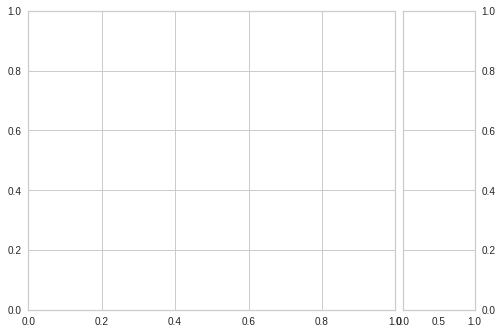

In [66]:
from pycaret.regression import evaluate_model

evaluate_model(tuned_br)

# deploy

In [68]:
from pycaret.regression import finalize_model

final_omp = finalize_model(tuned_omp)
print(final_omp)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=9,
                          normalize=False, precompute='auto', tol=None)


#前回
	Model	MAE	MSE	RMSE	R2	RMSLE	MAPE
0	Bayesian Ridge	0.8964	1.2683	1.1262	0.1359	0.5328	0.3625

In [69]:
from pycaret.regression import predict_model

predict_model(final_omp);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,0.8011,1.0757,1.0372,0.1703,0.4951,0.3274


In [71]:
from pycaret.regression import save_model

save_model(final_omp, "omp_model")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='スコア',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                 ('dummy', Dummify(target='スコア')),
                 ('fix_perfect', Remove_100(target='スコア')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),


In [81]:
from pycaret.regression import load_model

loaded_omp = load_model("omp_model")

Transformation Pipeline and Model Successfully Loaded


# get Pred Data

In [99]:
#試合日は以下を例に入力
#2021-8-9-15:00
def scrapePredData(homeTeamID,awayTeamID,year,matchDate):
    data = pd.DataFrame()
    url = 'https://www.football-lab.jp/comparison/team/' + year + '/' + homeTeamID + '/' + year + '/' + awayTeamID
    #得点パターン、失点パターンを取得
    df1 = pd.read_html(url)[18]
    df1 = df1.drop([0,2,4,6,8,10,12,14,16,18]).drop(df1.columns[[0,2,4,6]], axis=1)


    df2 = pd.read_html(url)[19]
    df2 = df2.drop([0,2,4,6,8,10,12,14,16,18]).drop(df2.columns[[0,2,4,6]], axis=1)
    df2 = df2.replace({'ＰＫ':'PK_A','セットプレー直接':'セットプレー直接_A','セットプレーから':'セットプレーから_A','クロスから':'クロスから_A',
                       'スルーパスから':'スルーパスから_A','ショートパスから':'ショートパスから_A','ロングパスから':'ロングパスから_A','ドリブルから':'ドリブルから_A',
                       'こぼれ球から':'こぼれ球から_A','その他':'その他_A'})

    df = pd.concat([df1,df2])
    df = df.reset_index(drop=True)
    df = df.rename(columns={'割合': 'home','Unnamed: 3': 'Data','割合.1': 'away'})
    df = df[['Data', 'home', 'away']]
    df = df.set_index('Data')
    df = df.T

    time.sleep(1)
    #チーム名と試合日
    homeTeam = get_keys_from_value(TeamDic,homeTeamID)
    awayTeam = get_keys_from_value(TeamDic,awayTeamID)
    df.insert(0, 'チーム名',[homeTeam,awayTeam])
    df.insert(0, '試合日', matchDate)
    data = pd.concat([data, df]) 
    dataList = ['ＰＫ','セットプレー直接','セットプレーから','クロスから','スルーパスから','ショートパスから','ロングパスから','ドリブルから','こぼれ球から','その他',
            'PK_A','セットプレー直接_A','セットプレーから_A','クロスから_A','スルーパスから_A','ショートパスから_A','ロングパスから_A','ドリブルから_A','こぼれ球から_A','その他_A']
    for item in dataList:   
        data[item] = data[item].str.replace('(', '')
        data[item] = data[item].str.replace(')', '')
        data[item] = data[item].str.replace('%', '').astype(np.float64) / 100

    return data


### Team Dic

In [97]:
TeamDic = {'札幌':'276', '仙台':'238', '鹿島':'120', '浦和':'122', '柏':'132', 'FC東京':'270', '川崎Ｆ':'86', '横浜FM':'124', '横浜FC':'296' , '湘南':'130', '清水':'126', '名古屋':'127', 'Ｇ大阪':'128','Ｃ大阪':'133', '神戸':'136','広島':'129', '徳島':'30116', '福岡':'135', '鳥栖':'269', '大分':'207'}

def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

### ここのTeamDicと日付を変えれば予想できる

In [118]:
pred_data = scrapePredData(TeamDic['川崎Ｆ'],TeamDic['浦和'],'2021','2021-8-21-19:00')

In [119]:
filename =  'predData' + '.csv'
pred_data.to_csv(filename, encoding = 'utf-8-sig') 
pred_data = pd.read_csv('/content/predData.csv')
pred_data.dtypes

Unnamed: 0     object
試合日            object
チーム名           object
ＰＫ            float64
セットプレー直接      float64
セットプレーから      float64
クロスから         float64
スルーパスから       float64
ショートパスから      float64
ロングパスから       float64
ドリブルから        float64
こぼれ球から        float64
その他           float64
PK_A          float64
セットプレー直接_A    float64
セットプレーから_A    float64
クロスから_A       float64
スルーパスから_A     float64
ショートパスから_A    float64
ロングパスから_A     float64
ドリブルから_A      float64
こぼれ球から_A      float64
その他_A         float64
dtype: object

In [120]:
pred_data['チーム名'].astype(str)
pred_data['チーム名'] = pred_data['チーム名'].str.replace('[', '')
pred_data['チーム名'] = pred_data['チーム名'].str.replace('\'', '')
pred_data['チーム名'] = pred_data['チーム名'].str.replace(']', '')

pred_data

,Unnamed: 0,試合日,チーム名,ＰＫ,セットプレー直接,セットプレーから,クロスから,スルーパスから,ショートパスから,ロングパスから,ドリブルから,こぼれ球から,その他,PK_A,セットプレー直接_A,セットプレーから_A,クロスから_A,スルーパスから_A,ショートパスから_A,ロングパスから_A,ドリブルから_A,こぼれ球から_A,その他_A
0,home,2021-8-21-19:00,川崎Ｆ,0.043,0.000,0.100,0.314,0.086,0.257,0.014,0.043,0.043,0.100,0.000,0.095,0.095,0.333,0.048,0.095,0.048,0.095,0.190,0.000
1,away,2021-8-21-19:00,浦和,0.159,0.023,0.136,0.182,0.114,0.205,0.068,0.045,0.045,0.023,0.029,0.059,0.147,0.235,0.029,0.176,0.088,0.029,0.118,0.088


# prediction

In [121]:
# pred_data = pred_data.drop('チーム名', axis=1)
#pred_data = pred_data.drop('Unnamed: 0',axis = 1)
prediction = predict_model(loaded_omp, data=pred_data)

In [122]:
print('Home',prediction['Label'][0],'vs','Away',prediction['Label'][1])

Home 2.26497933765865 vs Away 0.9732482632062498
